# Install, Load Packages

In [ ]:
!pip install causalml
!pip install scikit-plot

In [ ]:
pip install -q ydata-profiling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

import scikitplot as skplt

from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from causalml.inference.meta import BaseSClassifier
from causalml.dataset import make_uplift_classification
from causalml.inference.tree import UpliftRandomForestClassifier
import causalml.metrics as metrics
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

from IPython.display import Image
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 25
sns.set()


# Load Dataset

In [ ]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_promotion_uplift_modeling/data.csv")

In [ ]:
raw_data

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


# Data Profiling

In [ ]:
report = ProfileReport(raw_data, title='Report of Marketing Promotion Campaign')

In [ ]:
report.to_file('DataProfiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

View Data Profiling in this URL https://drive.google.com/file/d/1beBtOuHcAzogHf0A5DUn_Ege2lJAfM7Z/view?usp=sharing

*Note: download and open in your browser to view this profiling data*

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
raw_data.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

## Numerical Variable Distribution

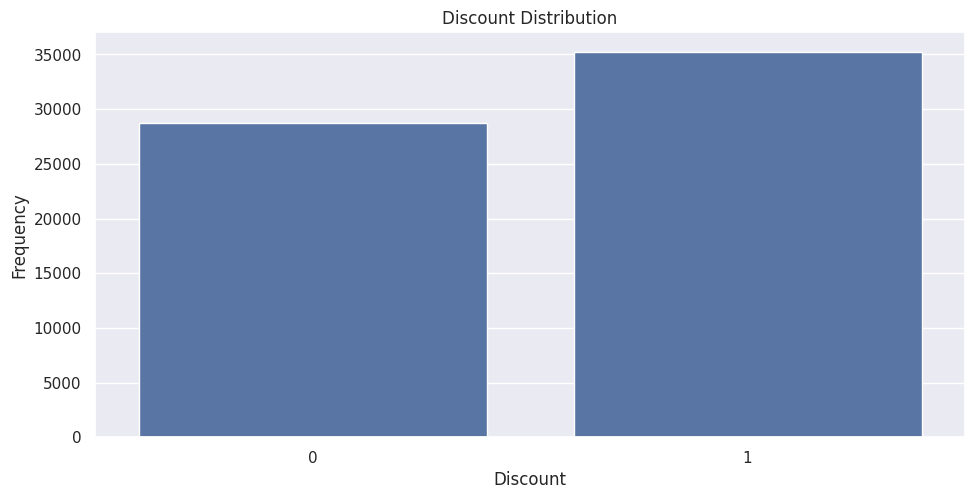

In [ ]:
#used_discount
sns.countplot(data = raw_data, x = 'used_discount')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.used_discount.value_counts()

used_discount
1    35266
0    28734
Name: count, dtype: int64

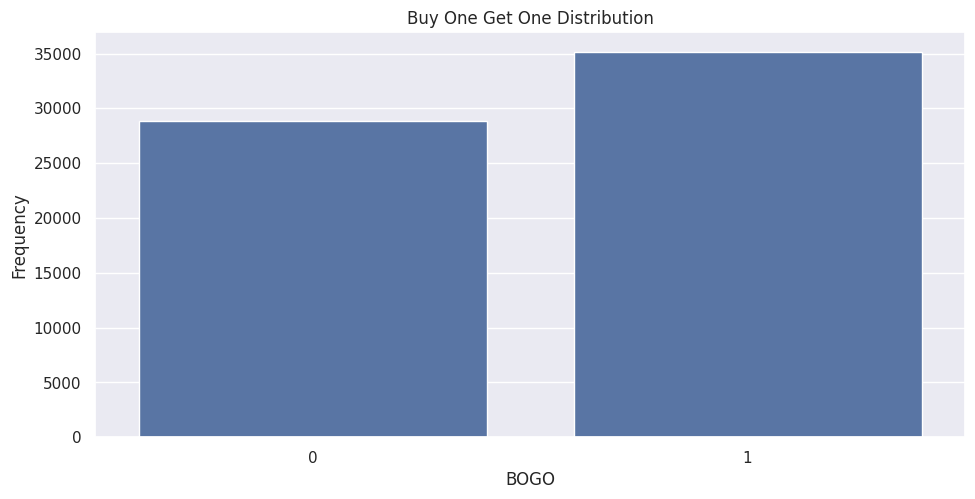

In [ ]:
#used_bogo
sns.countplot(data = raw_data, x = 'used_bogo')
plt.title('Buy One Get One Distribution')
plt.xlabel('BOGO')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.used_bogo.value_counts()

used_bogo
1    35182
0    28818
Name: count, dtype: int64

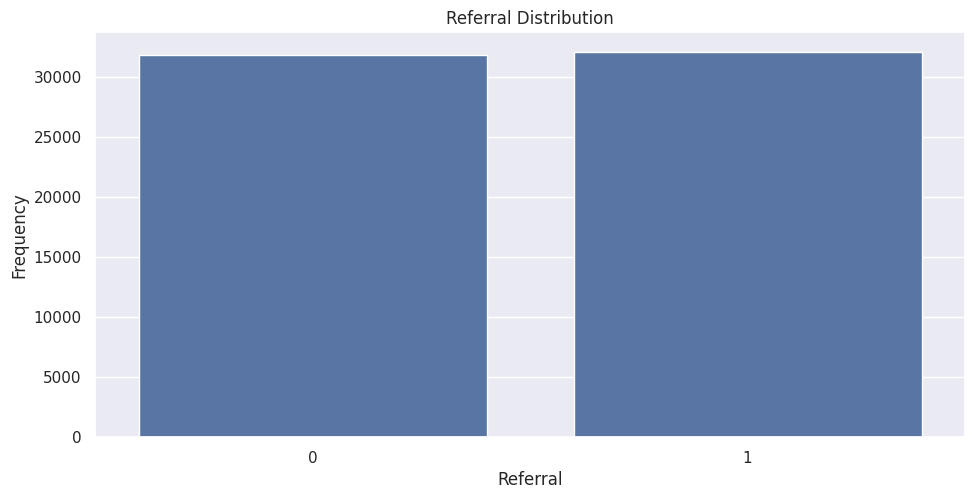

In [ ]:
#is_referral
sns.countplot(data = raw_data, x = 'is_referral')
plt.title('Referral Distribution')
plt.xlabel('Referral')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.is_referral.value_counts()

is_referral
1    32144
0    31856
Name: count, dtype: int64

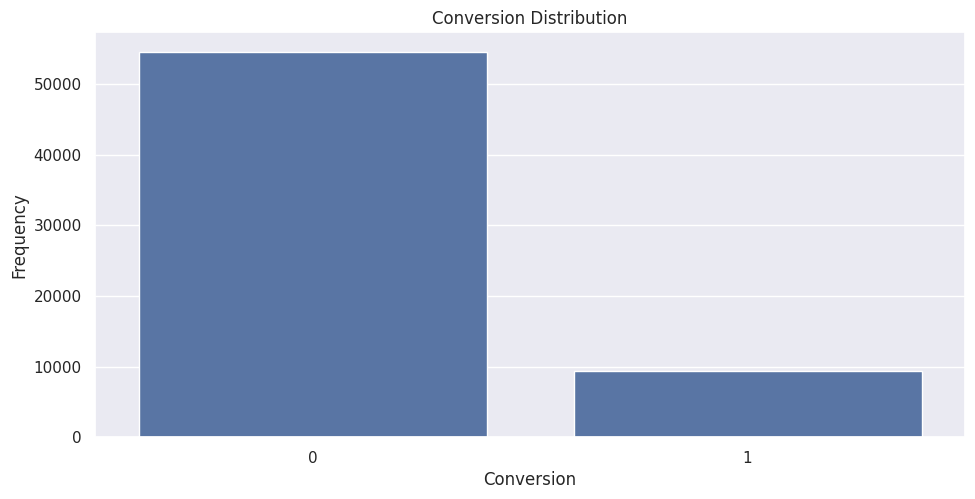

In [ ]:
#conversion
sns.countplot(data = raw_data, x = 'conversion')
plt.title('Conversion Distribution')
plt.xlabel('Conversion')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.conversion.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

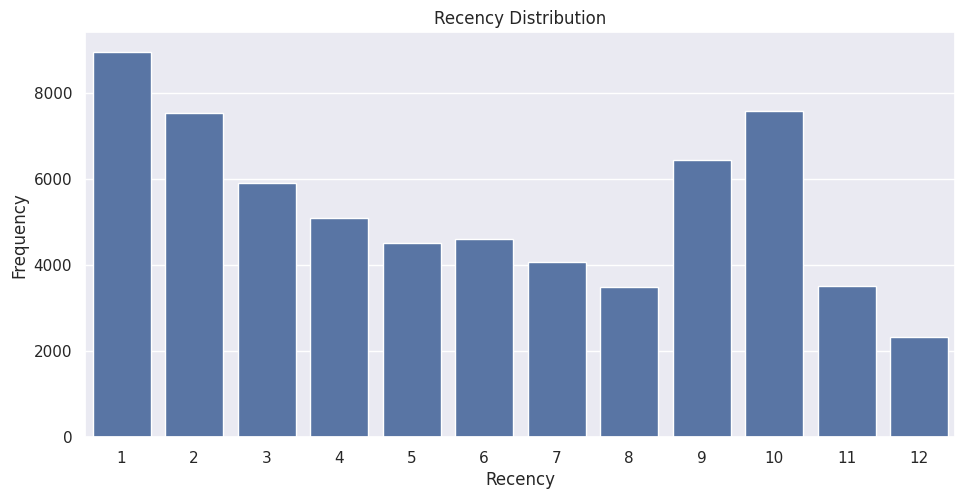

In [ ]:
sns.countplot(data = raw_data, x = 'recency')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.recency.value_counts()

recency
1     8952
10    7565
2     7537
9     6441
3     5904
4     5077
6     4605
5     4510
7     4078
11    3504
8     3495
12    2332
Name: count, dtype: int64

## Categorical Variable Distribution

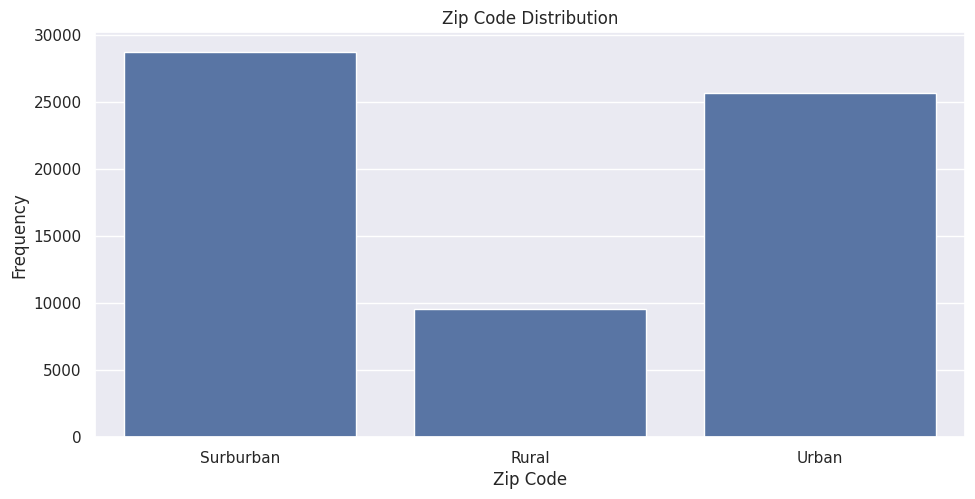

In [ ]:
#zip_code
sns.countplot(data = raw_data, x = 'zip_code')
plt.title('Zip Code Distribution')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.zip_code.value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

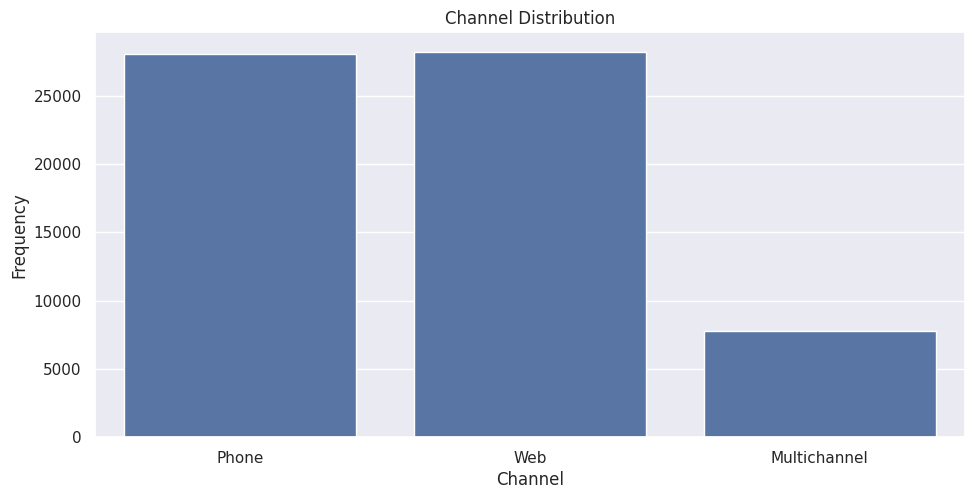

In [ ]:
#chanel
sns.countplot(data = raw_data, x = 'channel')
plt.title('Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.channel.value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

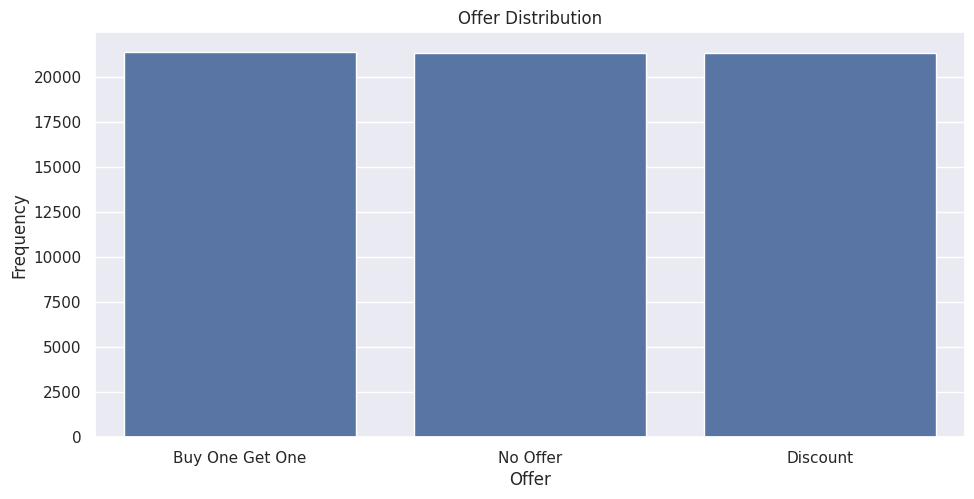

In [ ]:
sns.countplot(data = raw_data, x = 'offer');
plt.title('Offer Distribution')
plt.xlabel('Offer')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.offer.value_counts()

offer
Buy One Get One    21387
Discount           21307
No Offer           21306
Name: count, dtype: int64

## Conversion Rate

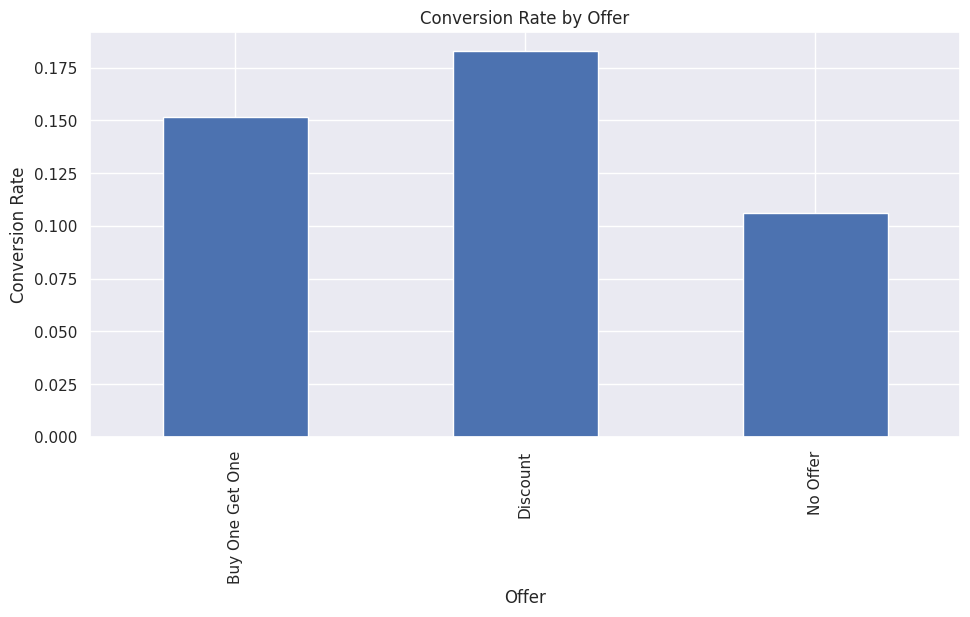

In [ ]:
conversion_rate_offer = raw_data.groupby('offer')['conversion'].mean()
conversion_rate_offer.plot(kind='bar')
plt.title('Conversion Rate by Offer')
plt.xlabel('Offer')
plt.ylabel('Conversion Rate')
plt.show()

In [ ]:
conversion_rate_offer

offer
Buy One Get One    0.151400
Discount           0.182757
No Offer           0.106167
Name: conversion, dtype: float64

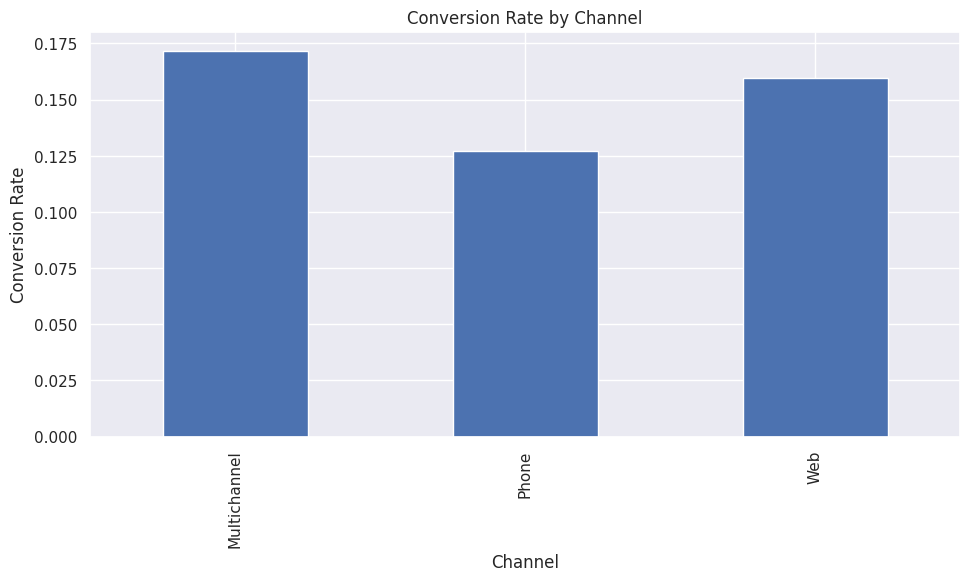

In [ ]:
conversion_rate_channel = raw_data.groupby('channel')['conversion'].mean()
conversion_rate_channel.plot(kind='bar')
plt.title('Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.show()

In [ ]:
conversion_rate_channel

channel
Multichannel    0.171734
Phone           0.127155
Web             0.159407
Name: conversion, dtype: float64

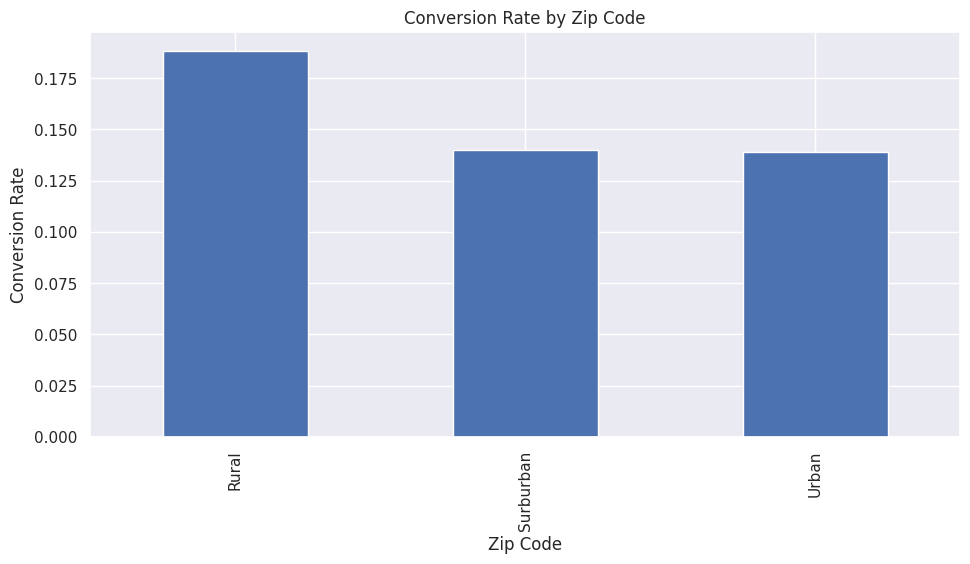

In [ ]:
conversion_rate_zip = raw_data.groupby('zip_code')['conversion'].mean()
conversion_rate_zip.plot(kind='bar')
plt.title('Conversion Rate by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Conversion Rate')
plt.show()

In [ ]:
conversion_rate_zip

zip_code
Rural        0.188121
Surburban    0.139943
Urban        0.139044
Name: conversion, dtype: float64

# Data Preprocessing to Modeling

In [ ]:
# treatment variable
treatment_variable = "offer"
# target variable
target_variable = "conversion"
# control category
control_category = "Buy One Get One"
# treatment category
treatment_category = "Discount"
# category to exclude if needed
exclusion_category = "No Offer"
# column to encode
categorical_columns = ["zip_code", "channel"]

## Remove Exclude Category

In [ ]:
# Preprocessing
if exclusion_category != None:
  raw_data = raw_data.loc[raw_data[treatment_variable] != exclusion_category].reset_index(drop=True)

In [ ]:
n_treatment = raw_data[treatment_variable].nunique()

In [ ]:
n_treatment

2

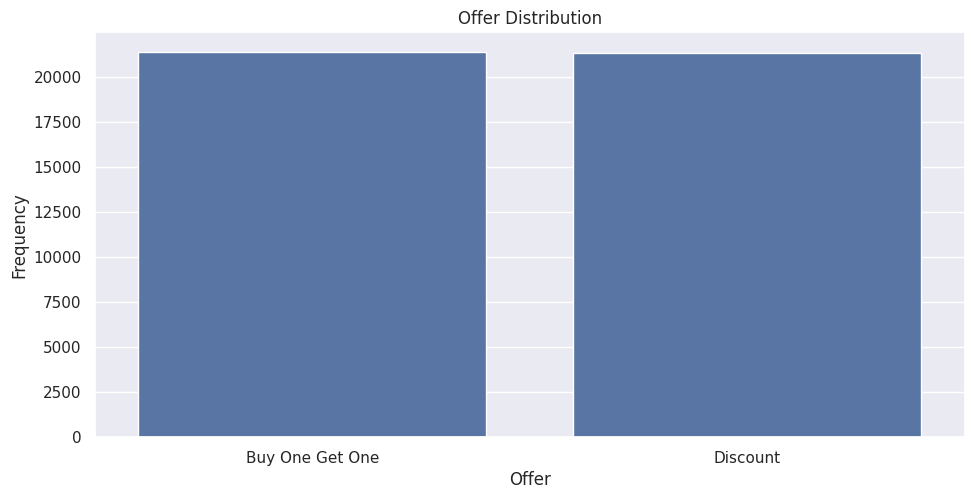

In [ ]:
sns.countplot(data = raw_data, x = treatment_variable);
plt.title('Offer Distribution')
plt.xlabel('Offer')
plt.ylabel('Frequency')
plt.show()

In [ ]:
raw_data.offer.value_counts()

offer
Buy One Get One    21387
Discount           21307
Name: count, dtype: int64

## Data Spliting

In [ ]:
# Train-Test Split Data
X_train, X_test = train_test_split(
    raw_data,
    test_size = 0.5,
    random_state = 1000
)

In [ ]:
X_train.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
6242,3,45.97,1,0,Surburban,1,Web,Buy One Get One,0
35476,9,64.77,1,0,Surburban,1,Web,Buy One Get One,0
13464,8,342.60,0,1,Surburban,0,Web,Discount,0
9149,2,860.80,1,1,Urban,1,Web,Discount,0
13145,9,375.54,1,0,Urban,0,Phone,Buy One Get One,0


In [ ]:
X_test.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
5359,7,152.98,1,0,Surburban,0,Web,Discount,0
28495,3,167.28,0,1,Urban,0,Web,Discount,0
25688,9,541.32,0,1,Surburban,1,Multichannel,Discount,0
4997,2,243.57,1,1,Urban,0,Multichannel,Discount,0
7299,5,180.99,0,1,Surburban,1,Phone,Discount,0


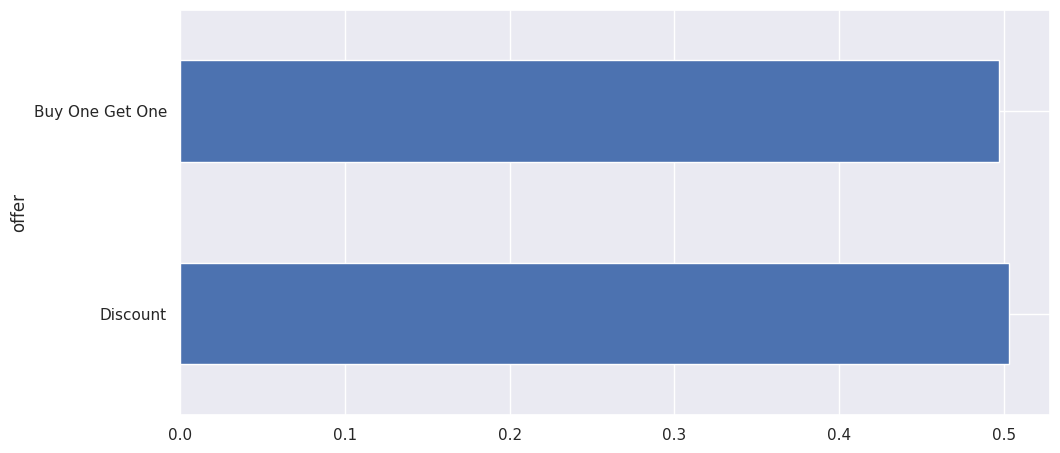

In [ ]:
X_train.offer.value_counts(normalize = True).plot.barh();

## One-hot Encoding

In [ ]:
# Encode categorical variables on X train data
dummies = pd.get_dummies(X_train[categorical_columns])
X_train = pd.concat([X_train.drop(categorical_columns, axis=1), dummies], axis=1)

# Encode categorical variables on X test data
dummies = pd.get_dummies(X_test[categorical_columns])
X_test = pd.concat([X_test.drop(categorical_columns, axis=1), dummies], axis=1)

In [ ]:
X_train.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
6242,3,45.97,1,0,1,Buy One Get One,0,False,True,False,False,False,True
35476,9,64.77,1,0,1,Buy One Get One,0,False,True,False,False,False,True
13464,8,342.60,0,1,0,Discount,0,False,True,False,False,False,True
9149,2,860.80,1,1,1,Discount,0,False,False,True,False,False,True
13145,9,375.54,1,0,0,Buy One Get One,0,False,False,True,False,True,False


In [ ]:
X_test.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
5359,7,152.98,1,0,0,Discount,0,False,True,False,False,False,True
28495,3,167.28,0,1,0,Discount,0,False,False,True,False,False,True
25688,9,541.32,0,1,1,Discount,0,False,True,False,True,False,False
4997,2,243.57,1,1,0,Discount,0,False,False,True,True,False,False
7299,5,180.99,0,1,1,Discount,0,False,True,False,False,True,False


## Check Spending History by Experiment Group

In [ ]:
is_treat = X_train[X_train.offer != control_category]
not_treat = X_train[X_train.offer == control_category]

In [ ]:
is_treat.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
13464,8,342.60,0,1,0,Discount,0,False,True,False,False,False,True
9149,2,860.80,1,1,1,Discount,0,False,False,True,False,False,True
41013,2,29.99,0,1,0,Discount,0,False,True,False,False,False,True
25025,2,95.29,1,0,1,Discount,0,False,False,True,False,True,False
20670,2,218.05,1,0,0,Discount,0,True,False,False,True,False,False


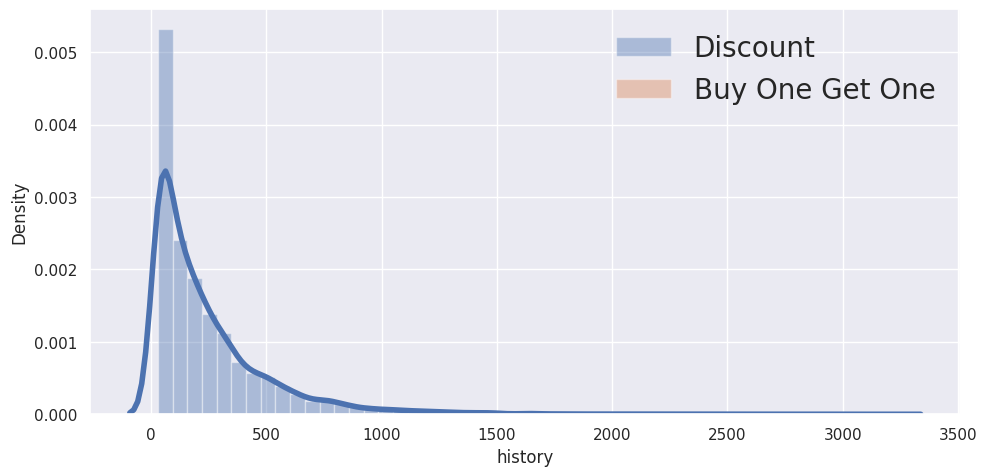

In [ ]:
# bins = 25
sns.distplot(is_treat.query("offer == 'Discount'").history, hist=True, kde=True, kde_kws={'linewidth': 4}, label='Discount')
sns.distplot(is_treat.query("offer == 'Buy One Get One'").history, hist=True, kde=True, kde_kws={'linewidth': 4}, label='Buy One Get One')
plt.legend(frameon=False, loc=0, ncol=1, prop={'size': 20});

## Check Recency Distribution by Experiment Group

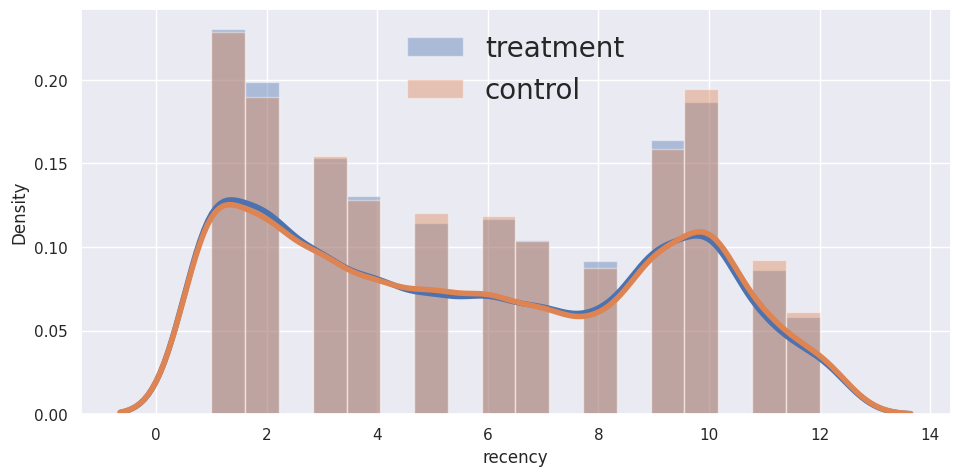

In [ ]:
# bins = 25
sns.distplot(is_treat.recency, hist=True, kde=True, kde_kws={'linewidth': 4}, label='treatment')
sns.distplot(not_treat.recency, hist=True, kde=True, kde_kws={'linewidth': 4}, label='control')
plt.legend(frameon=False, loc=0, ncol=1, prop={'size': 20});

# Develop Uplift Model

In [ ]:
X_train.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
6242,3,45.97,1,0,1,Buy One Get One,0,False,True,False,False,False,True
35476,9,64.77,1,0,1,Buy One Get One,0,False,True,False,False,False,True
13464,8,342.60,0,1,0,Discount,0,False,True,False,False,False,True
9149,2,860.80,1,1,1,Discount,0,False,False,True,False,False,True
13145,9,375.54,1,0,0,Buy One Get One,0,False,False,True,False,True,False


In [ ]:
x_col = X_train.drop([treatment_variable, target_variable], axis = 1).columns.tolist()
print(x_col)

['recency', 'history', 'used_discount', 'used_bogo', 'is_referral', 'zip_code_Rural', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Multichannel', 'channel_Phone', 'channel_Web']


## S-Learner

Define S-Learner (Classifier) using LGBMClassifier as base model

In [ ]:
slearner = BaseSClassifier(LGBMClassifier(), control_name=control_category)

**Estimate Average Treatment Effect**

In [ ]:
slearner.estimate_ate(X_train[x_col].values, X_train[treatment_variable].values, X_train[target_variable].values, bootstrap_ci  = True)

[LightGBM] [Info] Number of positive: 3554, number of negative: 17793
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 21347, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166487 -> initscore=-1.610731
[LightGBM] [Info] Start training from score -1.610731


array([0.03145511])

**Predict CATE for Each Treatment**

In [ ]:
slearner_tau = slearner.predict(X_test[x_col].values, X_test[treatment_variable].values, X_test[target_variable].values)

In [ ]:
slearner_tau

array([[ 0.02416307],
       [ 0.03136489],
       [ 0.02432166],
       ...,
       [ 0.00901794],
       [-0.00460468],
       [ 0.00063413]])

**Insert result to dataframe**

In [ ]:
X_test['s_learner_tau'] = slearner_tau

**Check uplift distribution**

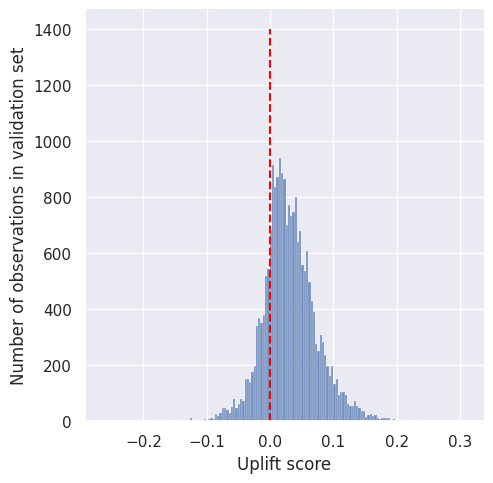

In [ ]:
sns.displot(data = X_test['s_learner_tau'])
plt.vlines([0], 0, 1400, linestyles = "dashed", colors = "red")
plt.xlabel('Uplift score')
plt.ylabel('Number of observations in validation set');

## Uplift-Tree (Uplift Random Forest)

Define uplift random forest classifier

In [ ]:
uplift_model = UpliftRandomForestClassifier(control_name=control_category, random_state=1000)

Fit model to data

In [ ]:
uplift_model.fit(
    X_train[x_col].values,
    treatment = X_train[treatment_variable].values,
    y = X_train[target_variable].values
)

Do prediction with trained model

In [ ]:
y_pred = uplift_model.predict(X_test[x_col].values, full_output=True)

Check the first 5 rows

In [ ]:
y_pred.head()

,Buy One Get One,Discount,recommended_treatment,delta_Discount,max_delta
0,0.117493,0.186378,1,0.068885,0.068885
1,0.176660,0.202104,1,0.025444,0.025444
2,0.186215,0.172096,0,-0.014118,-0.014118
3,0.169564,0.221276,1,0.051712,0.051712
4,0.170533,0.178704,1,0.008171,0.008171


In [ ]:
X_test['uplift_forest_tau'] = uplift_model.predict(X_test[x_col].values, full_output=False)

In [ ]:
X_test.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,s_learner_tau,uplift_forest_tau
5359,7,152.98,1,0,0,Discount,0,False,True,False,False,False,True,0.024163,0.068885
28495,3,167.28,0,1,0,Discount,0,False,False,True,False,False,True,0.031365,0.025444
25688,9,541.32,0,1,1,Discount,0,False,True,False,True,False,False,0.024322,-0.014118
4997,2,243.57,1,1,0,Discount,0,False,False,True,True,False,False,0.036934,0.051712
7299,5,180.99,0,1,1,Discount,0,False,True,False,False,True,False,-0.019032,0.008171


Check uplift distribution

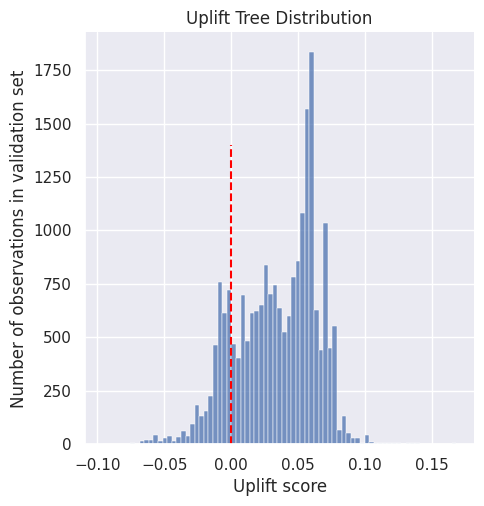

In [ ]:
sns.displot(data = X_test['uplift_forest_tau'])
plt.vlines([0], 0, 1400, linestyles = "dashed", colors = "red")
plt.title('Uplift Tree Distribution')
plt.xlabel('Uplift score')
plt.ylabel('Number of observations in validation set');

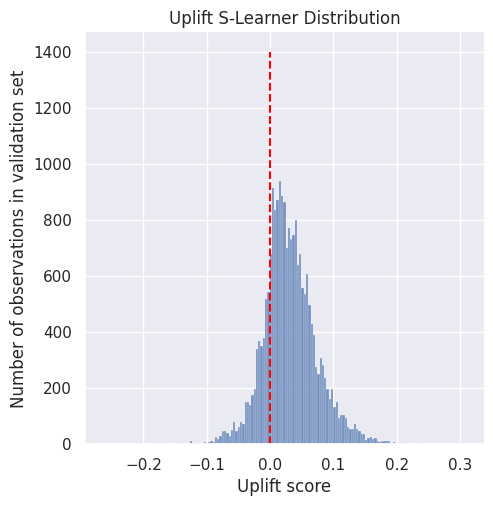

In [ ]:
sns.displot(data = X_test['s_learner_tau'])
plt.vlines([0], 0, 1400, linestyles = "dashed", colors = "red")
plt.title('Uplift S-Learner Distribution')
plt.xlabel('Uplift score')
plt.ylabel('Number of observations in validation set');

## Model Evaluation

In [ ]:
def auuc_metric_maker(dataframe, tau_outcome_var, control_category, treatment_category):

  treatment_category_result = X_test[[tau_outcome_var]].reset_index(drop=True)
  treatment_category_result.columns = [treatment_category]

  # If all deltas are negative, assing to control; otherwise assign to the treatment
  # with the highest delta
  best_treatment = np.where(
      (treatment_category_result < 0).all(axis=1),
      control_category,
      treatment_category_result.idxmax(axis=1)
  )
  # Create indicator variables for whether a unit happened to have the
  # recommended treatment or was in the control group
  actual_is_best = np.where(dataframe[treatment_variable] == best_treatment, 1, 0)
  actual_is_control = np.where(dataframe[treatment_variable] == control_category, 1, 0)

  synthetic = (actual_is_best == 1) | (actual_is_control == 1)
  synth = treatment_category_result[synthetic]

  auuc_score = (synth.assign(
      is_treated = 1 - actual_is_control[synthetic],
      conversion = dataframe.loc[synthetic, target_variable].values,
      model_result = synth.max(axis=1)
  ).drop(columns=list([treatment_category]))).rename(columns = {"model_result": tau_outcome_var})

  return auuc_score

### S-Learner Evaluation

In [ ]:
slearner_auuc_score = auuc_metric_maker(X_test, tau_outcome_var = "s_learner_tau", control_category = control_category, treatment_category = treatment_category)

In [ ]:
slearner_auuc_score.head()

,is_treated,conversion,s_learner_tau
0,1,0,0.024163
1,1,0,0.031365
2,1,0,0.024322
3,1,0,0.036934
5,0,0,0.058595


In [ ]:
print(slearner_auuc_score.columns)

Index(['is_treated', 'conversion', 's_learner_tau'], dtype='object')


Calculate treated group based who conversion our platform, treated or not

In [ ]:
slearner_auuc_score.groupby('is_treated').sum()[[target_variable]]

,conversion
is_treated,
0,1653
1,1569


### Uplift Forest Evaluation

In [ ]:
uplift_forest_auuc_score = auuc_metric_maker(X_test, tau_outcome_var = "uplift_forest_tau", control_category = control_category, treatment_category = treatment_category)

In [ ]:
uplift_forest_auuc_score.head()

,is_treated,conversion,uplift_forest_tau
0,1,0,0.068885
1,1,0,0.025444
3,1,0,0.051712
4,1,0,0.008171
5,0,0,0.054569


## Cumulative Gain Plot

**S-Learner Model**

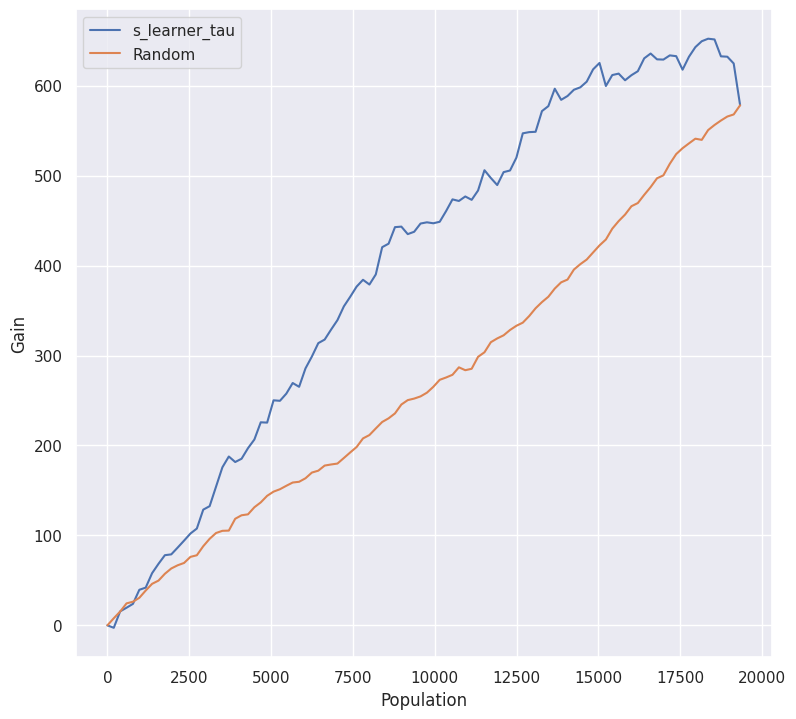

In [ ]:
metrics.plot_gain(slearner_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

**Uplift Forest Model**

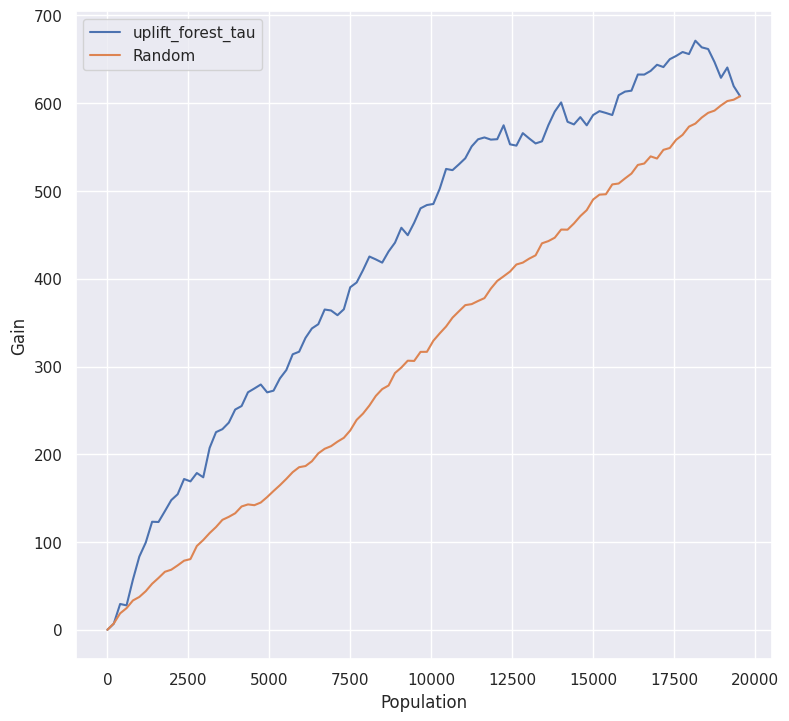

In [ ]:
metrics.plot_gain(uplift_forest_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

## AUUC and Qini Score

**AUUC for S-Learner**

In [ ]:
metrics.auuc_score(slearner_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

s_learner_tau    0.691273
Random           0.471160
dtype: float64

**AUUC for Uplift Forest**

In [ ]:
metrics.auuc_score(uplift_forest_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

uplift_forest_tau    0.706158
Random               0.517597
dtype: float64

**Qini Score for S-Learner**

In [ ]:
metrics.qini_score(slearner_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

s_learner_tau    0.29603
Random           0.00000
dtype: float64

**Qini Score for Uplift Forest**

In [ ]:
metrics.qini_score(uplift_forest_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

uplift_forest_tau    0.258296
Random               0.000000
dtype: float64

## Quantile Metrics

If the model is working well, we should see a larger positive difference in the highest decile, decreasing to a small or negative difference in the lowest decile (i.e. treatment rate similar to control rate, or lower than control rate). In other words, as predicted uplift increases, the true uplift from control to treatment group should increase as well.

**Create new dataframe object**

In [ ]:
X_test

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,s_learner_tau,uplift_forest_tau
5359,7,152.98,1,0,0,Discount,0,False,True,False,False,False,True,0.024163,0.068885
28495,3,167.28,0,1,0,Discount,0,False,False,True,False,False,True,0.031365,0.025444
25688,9,541.32,0,1,1,Discount,0,False,True,False,True,False,False,0.024322,-0.014118
4997,2,243.57,1,1,0,Discount,0,False,False,True,True,False,False,0.036934,0.051712
7299,5,180.99,0,1,1,Discount,0,False,True,False,False,True,False,-0.019032,0.008171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,9,29.99,1,0,1,Buy One Get One,0,True,False,False,False,True,False,0.041345,0.047643
4628,5,83.67,1,0,0,Buy One Get One,0,False,True,False,False,False,True,0.054705,0.068885
35577,11,75.44,0,1,1,Discount,0,False,True,False,False,False,True,0.009018,0.019820
14877,3,831.76,1,0,1,Discount,0,False,True,False,False,False,True,-0.004605,0.009101


In [ ]:
def quantile_and_treatment(dataframe, tau_outcome_var, treatment_variable, control_category, treatment_category):
  # Bin uplift score by using quantile
  score_quantiles, score_quantile_bins = pd.qcut(
    x = dataframe[tau_outcome_var],
    q = 10,
    retbins = True,
    duplicates = 'drop'
  )
  dataframe['Quantile bin'] = score_quantiles
  # Calculate number of samples for each bins
  count_by_quantile_and_treatment = dataframe.groupby(['Quantile bin', treatment_variable])[treatment_variable].count().unstack(-1)
  return count_by_quantile_and_treatment[[control_category, treatment_category]]

In [ ]:
final_result = quantile_and_treatment(X_test, tau_outcome_var = "uplift_forest_tau", treatment_variable = treatment_variable, control_category = control_category, treatment_category = treatment_category)

**Visualize the impact of the treatment**

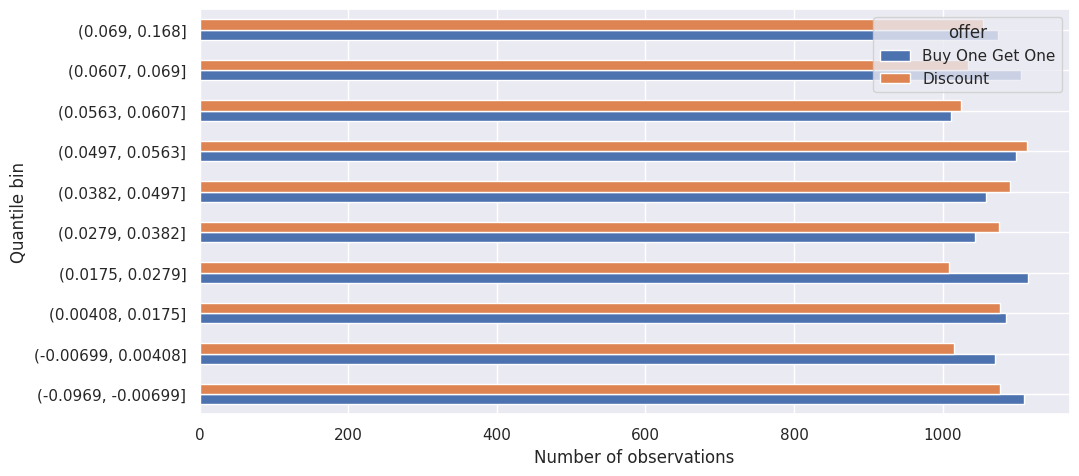

In [ ]:
final_result.plot.barh()
plt.xlabel('Number of observations');

## Uplift Quantile Chart

In [ ]:
def true_uplift(dataframe, tau_outcome_var, target_variable, treatment_variable, treatment_category, ):
  # Bin uplift score by using quantile
  score_quantiles, score_quantile_bins = pd.qcut(
    x = dataframe[tau_outcome_var],
    q = 10,
    retbins = True,
    duplicates = 'drop'
  )

  dataframe['Quantile bin'] = score_quantiles
  # Get the conversion rates within uplift score quantiles for both groups
  validation_treatment_mask = dataframe[treatment_variable] == treatment_category
  treatment_by_quantile = dataframe[validation_treatment_mask]\
    .groupby('Quantile bin')[target_variable].mean()
  control_by_quantile = dataframe[~validation_treatment_mask]\
    .groupby('Quantile bin')[target_variable].mean()
  # calculate true uplift
  true_uplift_by_quantile = treatment_by_quantile - control_by_quantile
  return true_uplift_by_quantile

In [ ]:
true_uplift_result = true_uplift(X_test, tau_outcome_var = "uplift_forest_tau", target_variable = target_variable, treatment_variable = treatment_variable, treatment_category = treatment_category)

In [ ]:
true_uplift_result.head(5)

Quantile bin
(-0.0969, -0.00699]   -0.015595
(-0.00699, 0.00408]    0.003934
(0.00408, 0.0175]      0.029074
(0.0175, 0.0279]       0.004637
(0.0279, 0.0382]       0.022326
Name: conversion, dtype: float64

**Visualize uplift quantile chart**





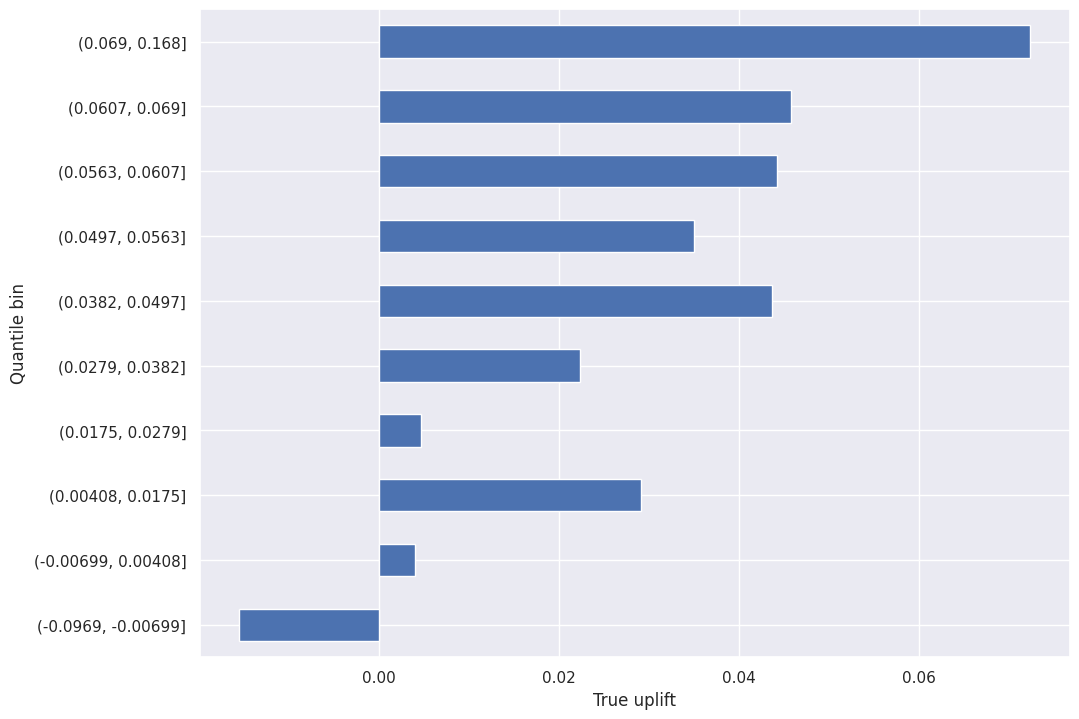

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)
true_uplift_result.plot.barh()
plt.xlabel('True uplift');

The uplift quantile chart shows that, for the most part, true uplift increases from lower score bins to higher ones, which is what we’d expect to see if the model is working. So it appears our model can effectively segment out customers who more readily respond to treatment.

## Model Interpretation

### Feature Importance (Gain, Permutation, etc)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

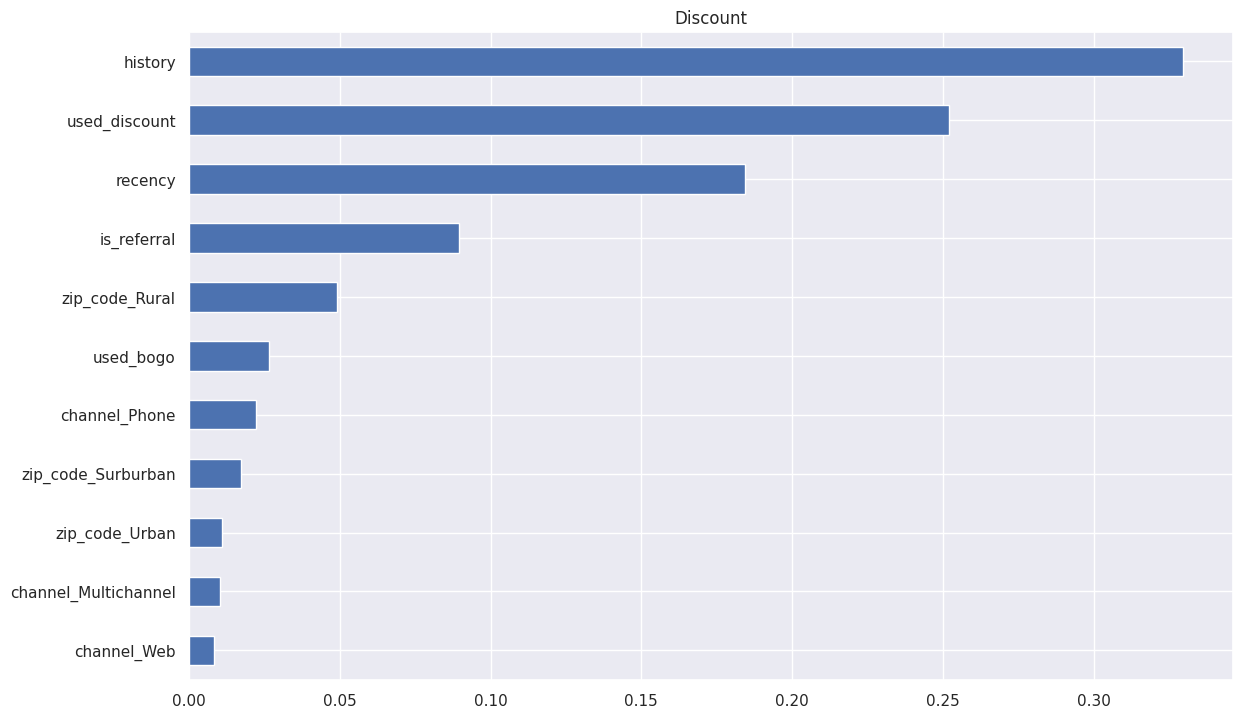

In [ ]:
slearner.plot_importance(X=X_test[x_col],
                        tau=X_test['s_learner_tau'],
                        method='auto',
                        random_state = 42,
                        features=x_col)

### Shapley Dependence Model

**Shap Value for History**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

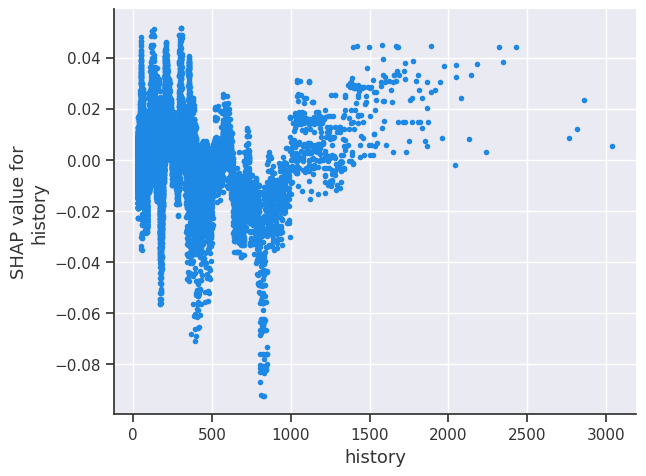

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='history',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

**Shap Value for used_discount**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

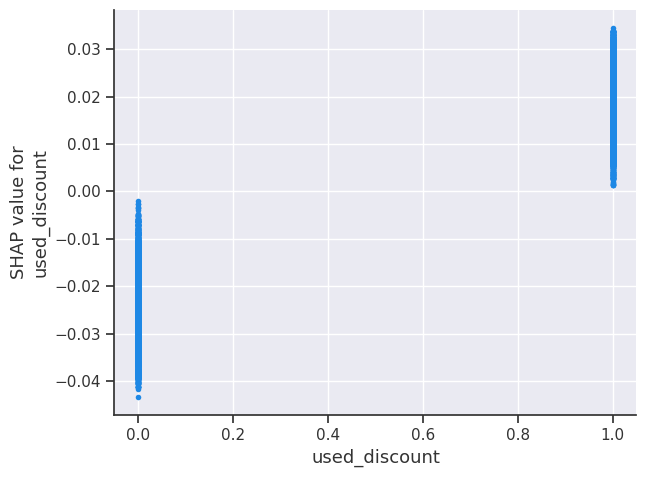

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='used_discount',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

**Shap Value for Recency**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

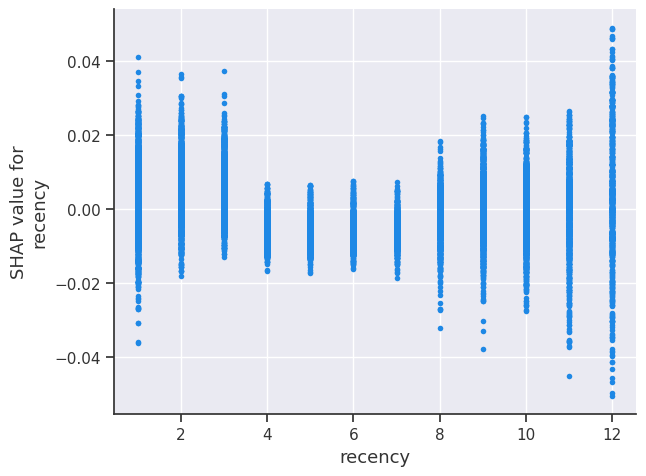

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='recency',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

Shap Value for is_referral

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

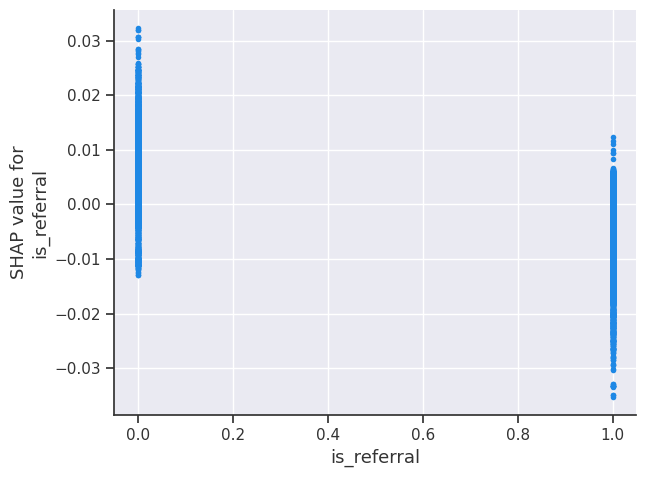

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='is_referral',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

**Shap Value for zip_code_Rural**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

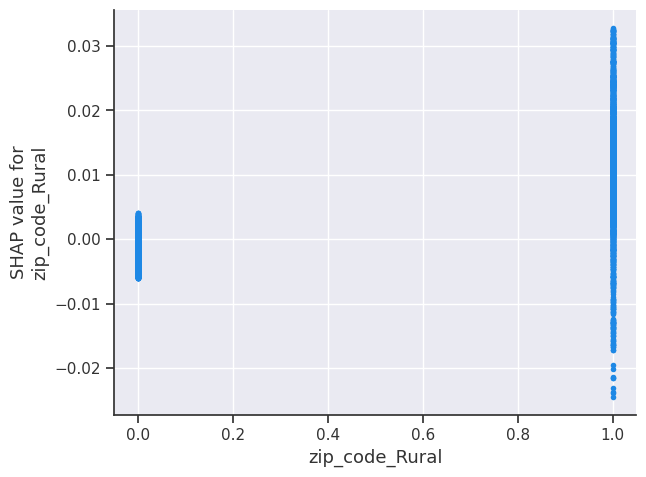

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='zip_code_Rural',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

**Shap Value for used_bogo**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

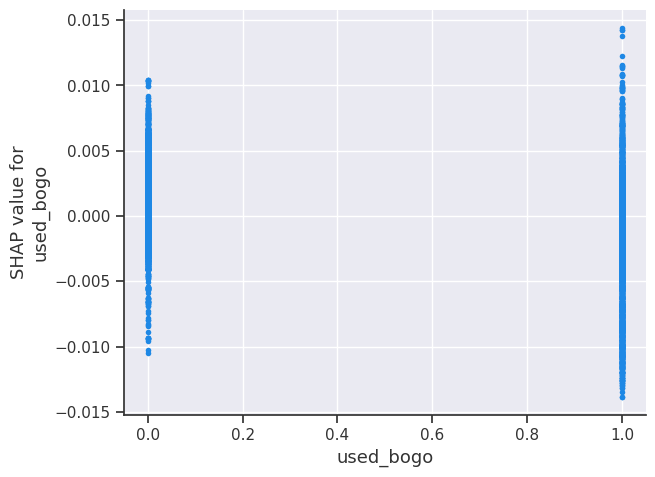

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='used_bogo',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

## Special Explanation Method for Tree-Based Model

### Feature Importance

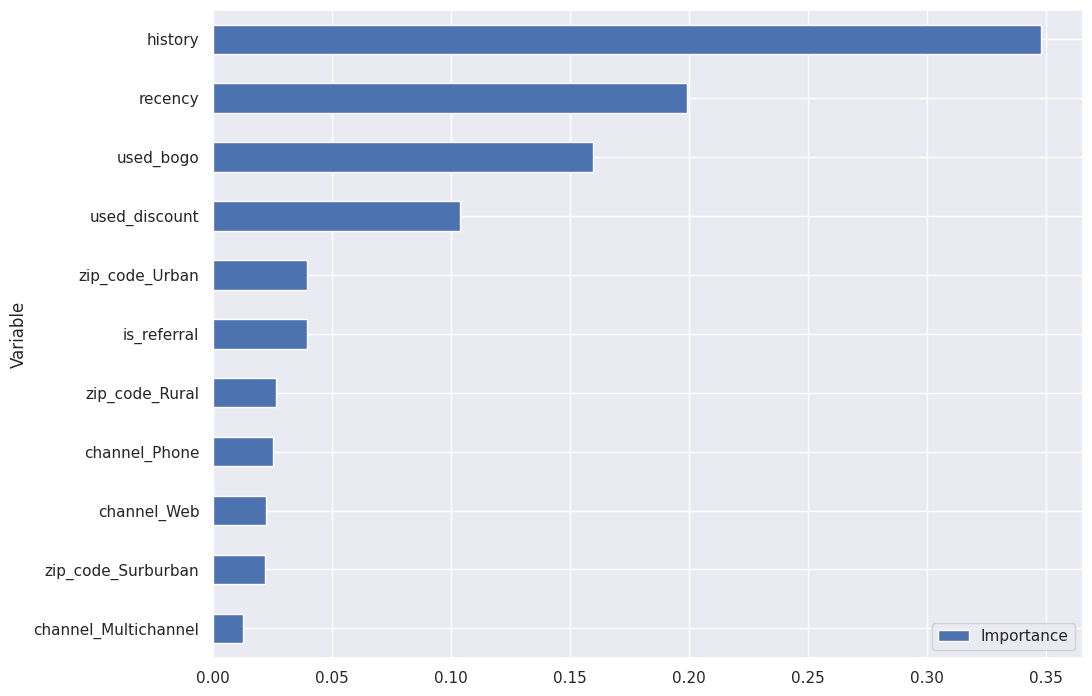

In [ ]:
pd.DataFrame(
    {
        "Variable": x_col,
        "Importance": uplift_model.feature_importances_
    }
).sort_values(by="Importance", ascending = True).plot(x = 'Variable', y = 'Importance', kind = 'barh');

### Tree Rules

Because we use random forest, we have a lot of tree in it, you can pick one to see the reason behind the model

In [ ]:
uplift_tree = uplift_model.uplift_forest[0]

In [ ]:
# Print uplift tree as a string
uplift_tree_string(uplift_tree.fitted_uplift_tree, x_col)

used_bogo >= 0.1?
yes -> history >= 90.95800000000001?
		yes -> zip_code_Surburban >= 0.1?
				yes -> channel_Web >= 0.1?
						yes -> [0.15926892950391644, 0.208955223880597]
						no  -> [0.2127659574468085, 0.1918918918918919]
				no  -> channel_Web >= 0.1?
						yes -> [0.2023529411764706, 0.2206035379812695]
						no  -> [0.18906605922551253, 0.2657185628742515]
		no  -> recency >= 11.0?
				yes -> history >= 55.21299999999999?
						yes -> [0.1506849315068493, 0.11320754716981132]
						no  -> [0.03597122302158273, 0.18064516129032257]
				no  -> history >= 85.0425?
						yes -> [0.23376623376623376, 0.07792207792207792]
						no  -> [0.18286879673691367, 0.15575465196416263]
no  -> is_referral >= 0.1?
		yes -> history >= 630.45?
				yes -> recency >= 2.0?
						yes -> [0.1643835616438356, 0.12849162011173185]
						no  -> [0.0759493670886076, 0.1744186046511628]
				no  -> channel_Web >= 0.1?
						yes -> [0.08134490238611713, 0.1251193887297039]
						no  -> [0.0585664335664335

### Tree Visualizer

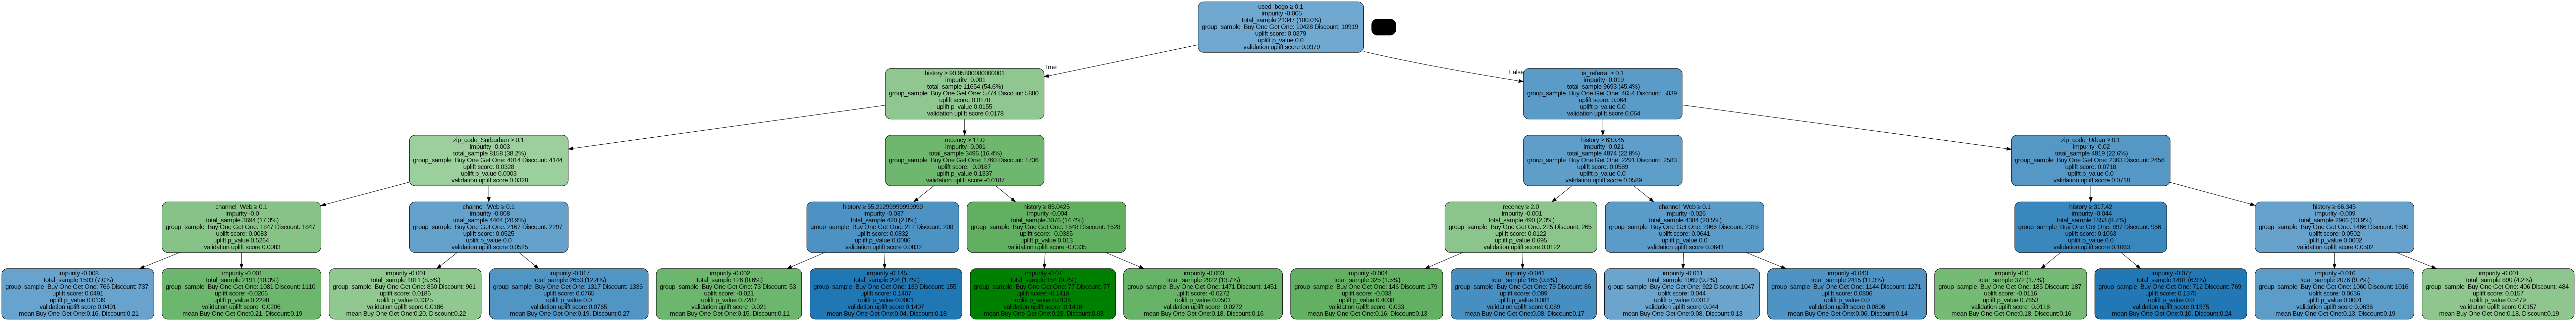

In [ ]:
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree, x_col)
Image(graph.create_png())